## This creates the mountains figure in AMOC paper.

In [2]:
import xarray as xr 
import matplotlib.pyplot as plt 
import os

In [ ]:
# prepare data
adr_home = os.path.join('C:','Users','nd20983','docs','Simulations','data','rawdata')
filenames = ['ser_get.nc', 'ser_sco.nc', 'ser_robo.nc']
adr_topo = os.path.join('C:','Users','nd20983','docs','Simulations','data','raw data')
filenames_topo = ['ser_060_getech.nc', 'ser_sco_003.nc', 'ser_rob_001.nc']
# read in land-sea-mask
ds = []
for filename in filenames:
    adr_in = os.path.join(adr_home, filename)
    file = xr.open_dataset('../../Simulations/data/rawdata/'+filename)
    ds.append(file)
# coordinates processing for robo
ds[2] = ds[2].assign_coords(
    {
        "longitude": robo.longitude_5,
        "latitude": robo.latitude_5
    }
)
get = ds[0].landhighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
sco = ds[1].landhighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
robo = ds[2].landhighorig.sel(latitude_5=slice(80, 0), longitude_5=slice(180, 320))
# read in orography
topo = []
for filename in filenames_topo:
    topo.append(xr.open_dataset('../../Simulations/data/raw data/'+filename))
o_get = topo[0].oroghighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
o_sco = topo[1].oroghighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
o_rob = topo[2].oroghighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))

C:\Users\nd20983\AppData\Local\Temp\ipykernel_13616\3319880038.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.97])


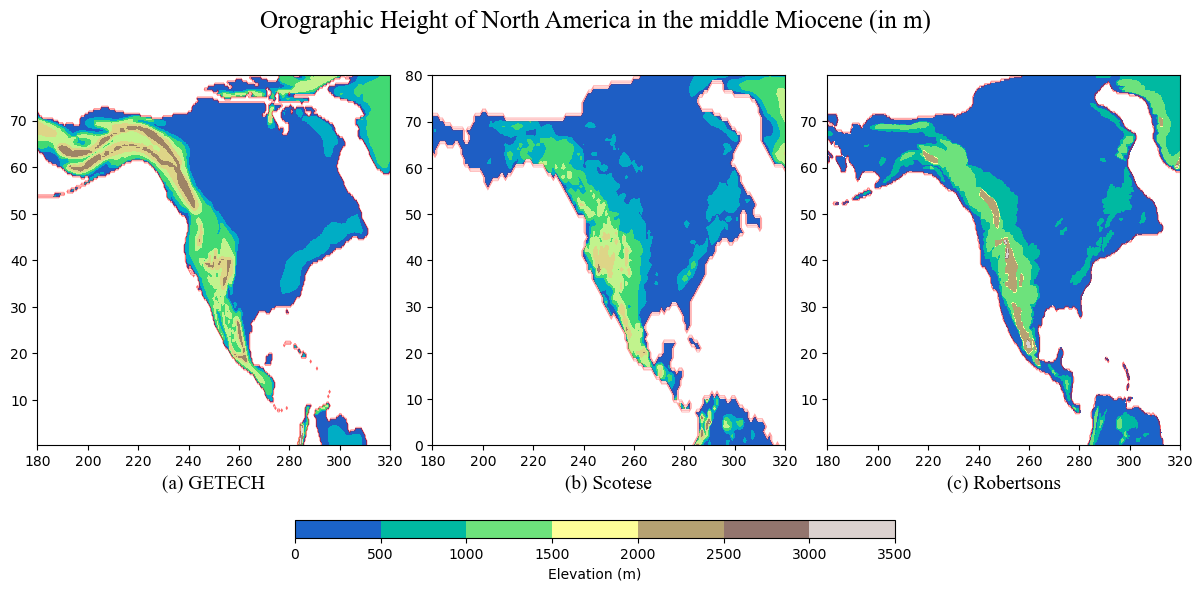

In [145]:
fig = plt.figure(figsize=(12,6))
# plot land-sea-mask
topo_dict = {'get':o_get, 'sco':o_sco, 'rob':o_rob}
title = ['(a) GETECH', '(b) Scotese', '(c) Robertsons']
font_label = {'family': 'Times New Roman',
              'weight': 'normal',
              'size': 14
             }
font_title = {'family': 'Times New Roman',
              'weight': 'normal',
              'size': 18
             }
for index, (label, geog) in enumerate({'get':get, 'sco':sco, 'rob':robo}.items()):
    oroghigh = topo_dict[label]
    ax = fig.add_subplot(1, 3, index+1)
    lsm = ax.contour(geog.longitude, geog.latitude, geog, colors='r',
                                   linewidths=0.1, extend='both')
    topo = ax.contourf(oroghigh.longitude, oroghigh.latitude, oroghigh, cmap='terrain',
                       )
    last_topo = topo    # store for colorbar
    ax.set_xlabel(title[index], fontdict=font_label)

# Add a single colorbar
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])
fig.colorbar(last_topo, cax=cbar_ax, orientation='horizontal', label='Elevation (m)',)
# Title and layout
# Note here, fontdict does work with suptitle, so use **font_title to unpack the dict
fig.suptitle('Orographic Height of North America in the middle Miocene (in m)', **font_title)
plt.tight_layout(rect=[0, 0.15, 1, 0.97])
plt.savefig('../../Paper/THESIS/chapter2_AMOC/figures/NAmerica_topography.png',
            format='png', dpi=200)

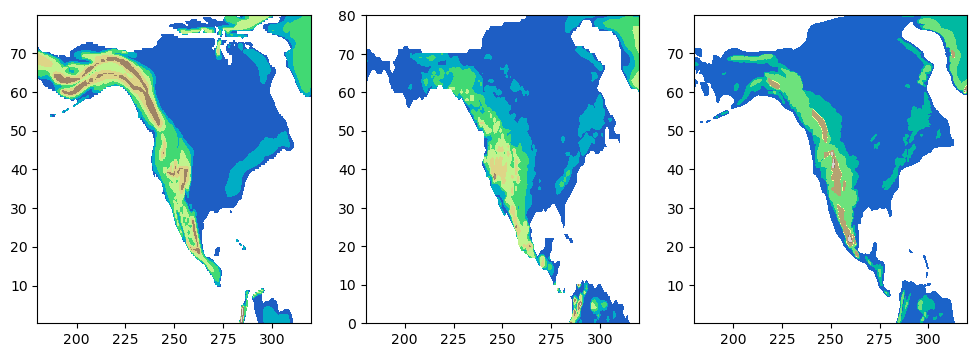

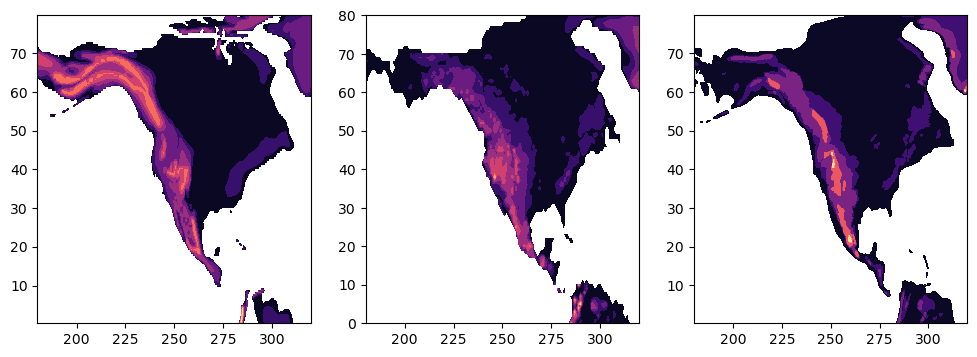

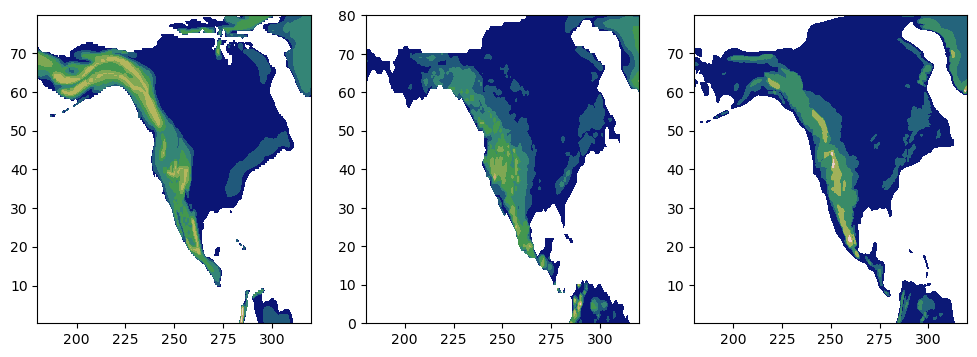

In [105]:
adr_topo = os.path.join('C:','Users','nd20983','docs','Simulations','data','raw data')
filenames_topo = ['ser_060_getech.nc', 'ser_sco_003.nc', 'ser_rob_001.nc']
topo = []
for filename in filenames_topo:
    topo.append(xr.open_dataset('../../Simulations/data/raw data/'+filename))
o_get = topo[0].oroghighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
o_sco = topo[1].oroghighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))
o_rob = topo[2].oroghighorig.sel(latitude=slice(80, 0), longitude=slice(180, 320))

fig = plt.figure(figsize=(12,4))
for index, (label, item) in enumerate({'get':o_get, 'sco':o_sco, 'rob':o_rob}.items()):
    ax = fig.add_subplot(1,3,index+1)
    im = ax.contourf(item.longitude, item.latitude, item, cmap='terrain')

fig1 = plt.figure(figsize=(12,4))
for index, (label, item) in enumerate({'get':o_get, 'sco':o_sco, 'rob':o_rob}.items()):
    ax = fig1.add_subplot(1,3,index+1)
    im = ax.contourf(item.longitude, item.latitude, item, cmap='magma')

fig2 = plt.figure(figsize=(12,4))
for index, (label, item) in enumerate({'get':o_get, 'sco':o_sco, 'rob':o_rob}.items()):
    ax = fig2.add_subplot(1,3,index+1)
    im = ax.contourf(item.longitude, item.latitude, item, cmap='gist_earth')